<a href="https://colab.research.google.com/github/Far0311/Data-Analysis-with-Phyton/blob/main/Heart_Attack_Predictor_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading dataset
import numpy as np
import pandas as pd
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#EDA
from collections import Counter
#data preprocessing
from sklearn.preprocessing import StandardScaler
#train test split
from sklearn.model_selection import train_test_split
#data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('Documents/heart_2022_no_nans.csv')
df = pd.DataFrame(data)
df = df.drop(['State', 'GeneralHealth','LastCheckupTime','RemovedTeeth','TetanusLast10Tdap','ECigaretteUsage','RaceEthnicityCategory','CovidPos','AgeCategory','HadDiabetes'], axis=1)
df = df.drop([0, 7])
df.head()

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
1,Male,0.0,0.0,Yes,6.0,No,No,No,No,No,...,Former smoker,No,1.78,95.25,30.13,No,No,Yes,Yes,No
2,Male,0.0,0.0,No,8.0,No,No,No,No,No,...,Former smoker,Yes,1.85,108.86,31.66,Yes,No,No,Yes,No
3,Female,5.0,0.0,Yes,9.0,No,No,No,No,Yes,...,Never smoked,No,1.70,90.72,31.32,No,No,Yes,Yes,No
4,Female,3.0,15.0,Yes,5.0,No,No,No,No,No,...,Never smoked,No,1.55,79.38,33.07,No,No,Yes,Yes,No
5,Male,0.0,0.0,Yes,7.0,No,No,No,No,No,...,Never smoked,Yes,1.85,120.20,34.96,Yes,Yes,Yes,No,No


In [ ]:
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Male', 'Female'), (1, 0), inplace=True)
df.replace(('Never smoked','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day'), (0, 1,1,1), inplace=True)
df.head()

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
1,1,0.0,0.0,1,6.0,0,0,0,0,0,...,1,0,1.78,95.25,30.13,0,0,1,1,0
2,1,0.0,0.0,0,8.0,0,0,0,0,0,...,1,1,1.85,108.86,31.66,1,0,0,1,0
3,0,5.0,0.0,1,9.0,0,0,0,0,1,...,0,0,1.70,90.72,31.32,0,0,1,1,0
4,0,3.0,15.0,1,5.0,0,0,0,0,0,...,0,0,1.55,79.38,33.07,0,0,1,1,0
5,1,0.0,0.0,1,7.0,0,0,0,0,0,...,0,1,1.85,120.20,34.96,1,1,1,0,0


In [ ]:
matrix = df.corr(method="spearman").round(2)
matrix.style.background_gradient()

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
Sex,1.000000,-0.070000,-0.130000,0.060000,-0.020000,0.070000,0.070000,0.000000,-0.080000,-0.000000,-0.030000,-0.140000,-0.010000,-0.100000,0.070000,-0.020000,-0.040000,-0.070000,-0.010000,-0.070000,0.070000,0.060000,0.720000,0.390000,0.040000,0.090000,-0.010000,-0.070000,-0.060000,0.050000
PhysicalHealthDays,-0.070000,1.000000,0.300000,-0.180000,-0.080000,0.110000,0.120000,0.110000,0.140000,0.020000,0.190000,0.220000,0.120000,0.220000,0.080000,0.120000,0.220000,0.350000,0.240000,0.260000,0.080000,0.160000,-0.060000,0.060000,0.100000,-0.090000,0.070000,0.020000,0.090000,0.030000
MentalHealthDays,-0.130000,0.300000,1.000000,-0.060000,-0.150000,-0.000000,-0.000000,0.020000,0.130000,-0.050000,0.070000,0.440000,0.020000,0.030000,-0.000000,0.070000,0.330000,0.110000,0.120000,0.190000,0.050000,0.010000,-0.070000,0.010000,0.040000,0.020000,0.140000,-0.050000,-0.050000,0.130000
PhysicalActivities,0.060000,-0.180000,-0.060000,1.000000,0.020000,-0.080000,-0.080000,-0.080000,-0.040000,0.010000,-0.140000,-0.080000,-0.080000,-0.120000,-0.070000,-0.090000,-0.110000,-0.280000,-0.170000,-0.190000,-0.090000,-0.100000,0.090000,-0.080000,-0.140000,0.160000,0.020000,0.030000,-0.050000,0.020000
SleepHours,-0.020000,-0.080000,-0.150000,0.020000,1.000000,0.000000,0.010000,0.010000,-0.050000,0.050000,-0.030000,-0.060000,0.000000,-0.010000,0.020000,-0.030000,-0.080000,-0.030000,-0.040000,-0.050000,-0.020000,-0.010000,-0.010000,-0.060000,-0.070000,0.000000,-0.090000,0.070000,0.070000,-0.050000
HadHeartAttack,0.070000,0.110000,-0.000000,-0.080000,0.000000,1.000000,0.450000,0.180000,0.020000,0.050000,0.130000,0.020000,0.110000,0.120000,0.100000,0.070000,0.050000,0.160000,0.080000,0.090000,0.090000,0.170000,0.030000,0.040000,0.040000,-0.070000,-0.010000,0.050000,0.120000,-0.020000
HadAngina,0.070000,0.120000,-0.000000,-0.080000,0.010000,0.450000,1.000000,0.150000,0.030000,0.080000,0.150000,0.030000,0.140000,0.150000,0.110000,0.070000,0.050000,0.170000,0.090000,0.090000,0.080000,0.180000,0.020000,0.050000,0.050000,-0.070000,-0.020000,0.080000,0.160000,-0.030000
HadStroke,0.000000,0.110000,0.020000,-0.080000,0.010000,0.180000,0.150000,1.000000,0.040000,0.040000,0.110000,0.040000,0.090000,0.100000,0.080000,0.090000,0.080000,0.170000,0.110000,0.120000,0.060000,0.140000,-0.020000,0.010000,0.020000,-0.070000,-0.000000,0.030000,0.090000,-0.010000
HadAsthma,-0.080000,0.140000,0.130000,-0.040000,-0.050000,0.020000,0.030000,0.040000,1.000000,-0.000000,0.200000,0.150000,0.040000,0.090000,0.020000,0.050000,0.110000,0.100000,0.070000,0.090000,0.020000,0.080000,-0.070000,0.050000,0.090000,-0.030000,0.070000,0.020000,0.090000,0.030000
HadSkinCancer,-0.000000,0.020000,-0.050000,0.010000,0.050000,0.050000,0.080000,0.040000,-0.000000,1.000000,0.040000,-0.010000,0.060000,0.120000,0.080000,0.010000,-0.020000,0.040000,0.010000,0.000000,0.020000,0.090000,0.000000,-0.040000,-0.040000,0.010000,-0.060000,0.110000,0.170000,-0.040000


In [ ]:
df = df.drop(['MentalHealthDays', 'PhysicalActivities','SleepHours','HeightInMeters','WeightInKilograms','AlcoholDrinkers','HIVTesting'], axis=1)
df.head()

,Sex,PhysicalHealthDays,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,BMI,FluVaxLast12,PneumoVaxEver,HighRiskLastYear
1,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,30.13,1,1,0
2,1,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,31.66,0,1,0
3,0,5.0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,31.32,1,1,0
4,0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,33.07,1,1,0
5,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,34.96,1,0,0


In [ ]:
y = df["HadHeartAttack"]
X = df.drop('HadHeartAttack',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 186029, 1: 10787})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[46549     8]
 [ 2631    16]]


Accuracy of Random Forest: 94.63661490935696 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46557
           1       0.67      0.01      0.01      2647

    accuracy                           0.95     49204
   macro avg       0.81      0.50      0.49     49204
weighted avg       0.93      0.95      0.92     49204



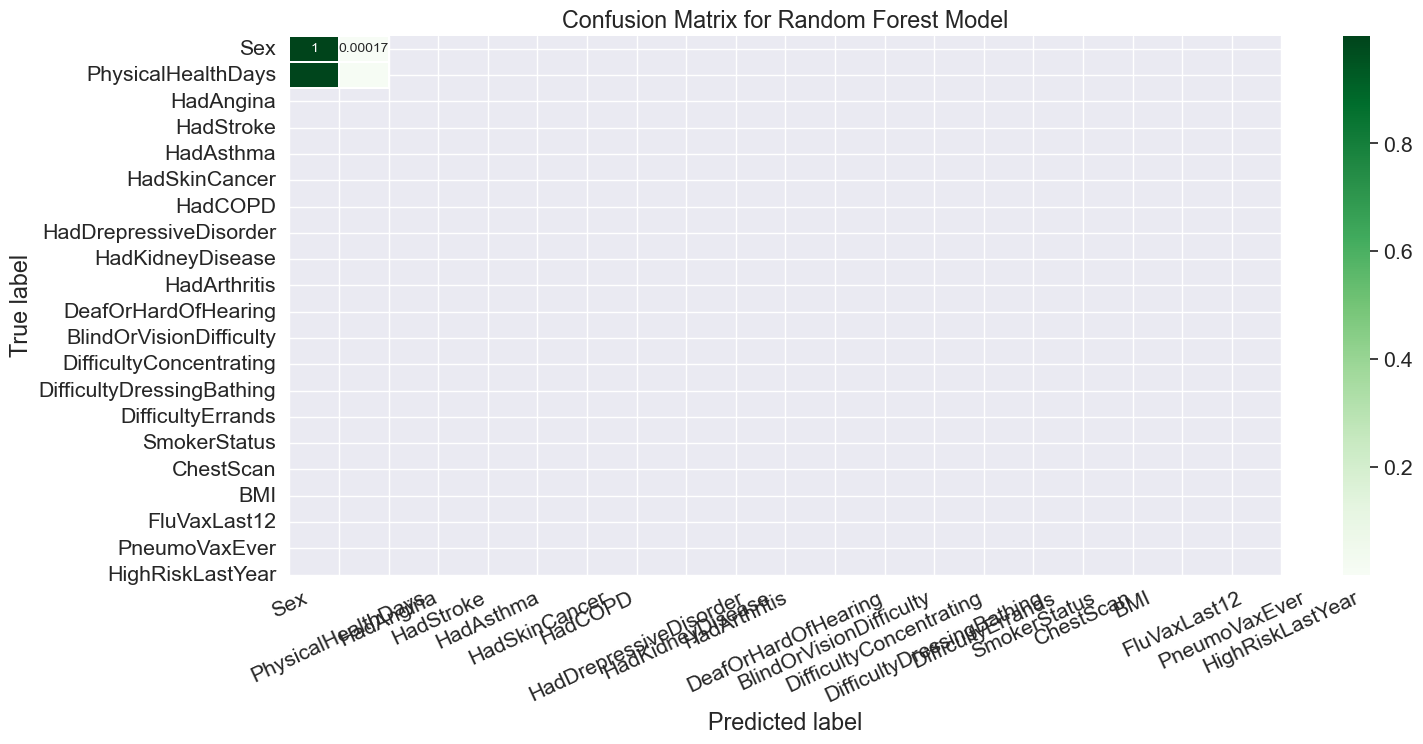

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['Sex', 'PhysicalHealthDays', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDrepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating','DifficultyDressingBathing','DifficultyErrands','SmokerStatus','ChestScan','BMI','FluVaxLast12','PneumoVaxEver','HighRiskLastYear'], 'Importance': rf.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

ValueError: All arrays must be of the same length